# Part II: Machine Learning Analysis 

This is the continuation of "Sustainability_Analysis.ipynb" where the data from the UN's Global Sustainable Development Goals website was cleaned and merged into the csv file below.

Country development ranking determined by the Human Development Index for 2020 was downloaded as a csv file and referenced here: https://worldpopulationreview.com/countries/developed-countries/

In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy import stats

In [6]:
# Read in the csv file
sustainability_mat = pd.read_csv('data/merged_consumption_hdi.csv')
sustainability_mat.head(20)

,name,year,HDI,Population,MCPC
0,Afghanistan,2010,0.498,38928.346,12.528861
1,Afghanistan,2011,0.498,38928.346,11.792660
2,Afghanistan,2012,0.498,38928.346,12.081480
3,Afghanistan,2013,0.498,38928.346,12.033060
4,Afghanistan,2014,0.498,38928.346,11.688480
5,Afghanistan,2015,0.498,38928.346,11.579040
6,Afghanistan,2016,0.498,38928.346,11.504060
7,Afghanistan,2017,0.498,38928.346,11.473160
8,Albania,2010,0.785,2877.797,48.234960
9,Albania,2011,0.785,2877.797,48.667060


In [3]:
# Drop null values
print(sustainability_mat.info())
sustainability_mat = sustainability_mat.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
name          1312 non-null object
year          1312 non-null int64
HDI           1312 non-null float64
Population    1312 non-null float64
MCPC          1312 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 51.4+ KB
None


In [4]:
# Cleaned dataset has 486 rows and 6 columns
print(sustainability_mat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1311
Data columns (total 5 columns):
name          1312 non-null object
year          1312 non-null int64
HDI           1312 non-null float64
Population    1312 non-null float64
MCPC          1312 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 61.5+ KB
None


### Global data

In [8]:
# Create a list of the columns

columns = ['name','HDI', 'Population','year', 'MCPC']

#  Create a new df for the countries of interest with the columns. 
world_sustainability_mat = sustainability_mat.loc[:,  columns]
world_sustainability_mat

,name,HDI,Population,year,MCPC
0,Afghanistan,0.498,38928.346,2010,12.528861
1,Afghanistan,0.498,38928.346,2011,11.792660
2,Afghanistan,0.498,38928.346,2012,12.081480
3,Afghanistan,0.498,38928.346,2013,12.033060
4,Afghanistan,0.498,38928.346,2014,11.688480
...,...,...,...,...,...
1307,Zimbabwe,0.535,14862.924,2013,19.213920
1308,Zimbabwe,0.535,14862.924,2014,20.650940
1309,Zimbabwe,0.535,14862.924,2015,19.497560
1310,Zimbabwe,0.535,14862.924,2016,18.887940


In [10]:
world_sustainability_mat['name'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jo

## Machine Learning SKlearn Linear Regression 

In [12]:
# Assign the data to X and y and reshape data into array

X = world_sustainability_mat[["year", "HDI", "Population"]]
y = world_sustainability_mat[["MCPC"]]


#y = whether or not met goal
print("Shape: ", X.shape, y.shape)
print(X)
print(y)

Shape:  (1312, 3) (1312, 1)
      year    HDI  Population
0     2010  0.498   38928.346
1     2011  0.498   38928.346
2     2012  0.498   38928.346
3     2013  0.498   38928.346
4     2014  0.498   38928.346
...    ...    ...         ...
1307  2013  0.535   14862.924
1308  2014  0.535   14862.924
1309  2015  0.535   14862.924
1310  2016  0.535   14862.924
1311  2017  0.535   14862.924

[1312 rows x 3 columns]
           MCPC
0     12.528861
1     11.792660
2     12.081480
3     12.033060
4     11.688480
...         ...
1307  19.213920
1308  20.650940
1309  19.497560
1310  18.887940
1311  18.316400

[1312 rows x 1 columns]


In [13]:
# Use sklearn's `train_test_split` to split the data between training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [14]:
# Use Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit model to training data

model.fit(X_train, y_train)
trainingScore = model.score(X_train, y_train)
testingScore = model.score(X_test, y_test)

print(f"Training Score: {trainingScore}")
print(f"Testing Score: {testingScore}")

Training Score: 0.3525047375312821
Testing Score: 0.37476650281358814


Text(0.5, 1.0, 'Residual Plot')

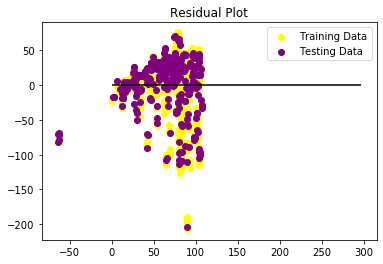

In [15]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="yellow", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1564.7425629545828, R2: 0.37476650281358814
